In [1]:
import os
import json
import random
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon



In [2]:
def load_segmentation(json_path):
    """
    JSON 파일에서 세그멘테이션 데이터를 로드합니다.
    """
    with open(json_path, 'r') as f:
        data = json.load(f)
    
    # 'segmentation' 리스트를 반환
    return data['segmentation']

def visualize_segmentation(image_path, json_path):
    """
    이미지와 JSON 파일의 세그멘테이션 데이터를 시각화합니다.
    """
    # 이미지 로드
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)

    # 세그멘테이션 로드
    segmentations = load_segmentation(json_path)

    # 시각화
    plt.figure(figsize=(12, 6))
    plt.imshow(image_np)
    
    # 각 세그멘테이션의 폴리곤을 그리기
    for segmentation in segmentations:
        polygon_points = np.array(segmentation['polygon'])
        polygon = Polygon(polygon_points, closed=True, edgecolor='red', fill=False, linewidth=2)
        plt.gca().add_patch(polygon)
        plt.text(polygon_points[0][0], polygon_points[0][1], segmentation['name'], color='red', fontsize=12, backgroundcolor='white')
    
    plt.axis("off")
    plt.show()

In [12]:
import os
import math

def count_files_and_size_in_folder(folder_path):
    file_count = 0
    total_size = 0  # 총 파일 크기 (바이트 단위)
    
    for root, dirs, files in os.walk(folder_path):
        file_count += len(files)
        for file in files:
            file_path = os.path.join(root, file)
            total_size += os.path.getsize(file_path)
    
    return file_count, total_size

def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return f"{s} {size_name[i]}"

# 예시 폴더 경로
folder_path = "/home/elicer/jyj/원천데이터/실외_중소형주차장_segmentation_dataset_원천데이터_새로운거/중소형주차장_302"  # 확인하려는 폴더 경로로 바꿔주세요

# 파일 수 및 총 용량 계산
total_files, total_size = count_files_and_size_in_folder(folder_path)
formatted_size = convert_size(total_size)

print(f"폴더 내의 파일 수: {total_files}개")
print(f"폴더 내의 총 파일 용량: {formatted_size}")


폴더 내의 파일 수: 200개
폴더 내의 총 파일 용량: 144.55 MB


Processing image: 20240311.jpg


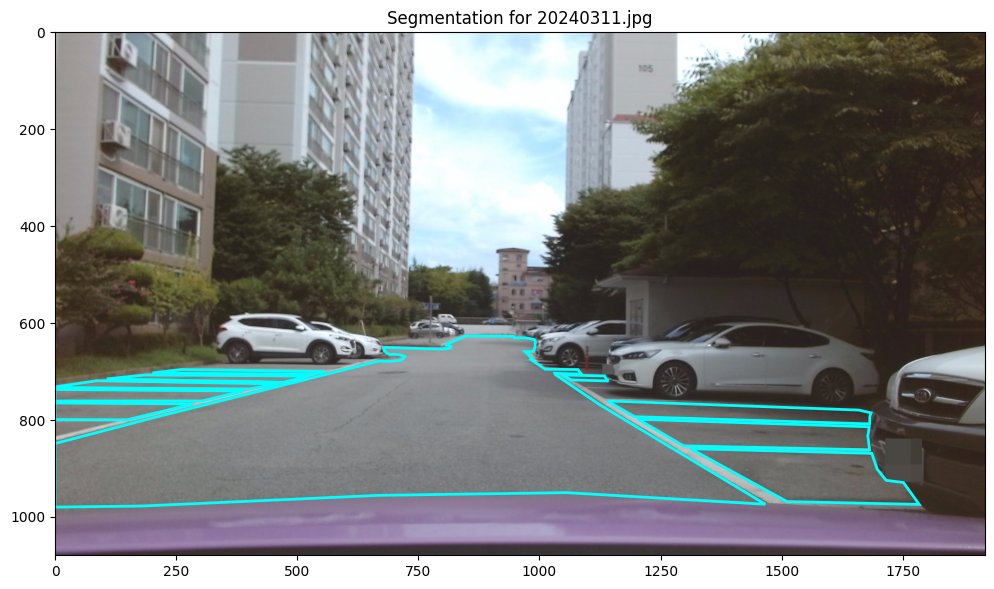

Processing image: 40260080.jpg


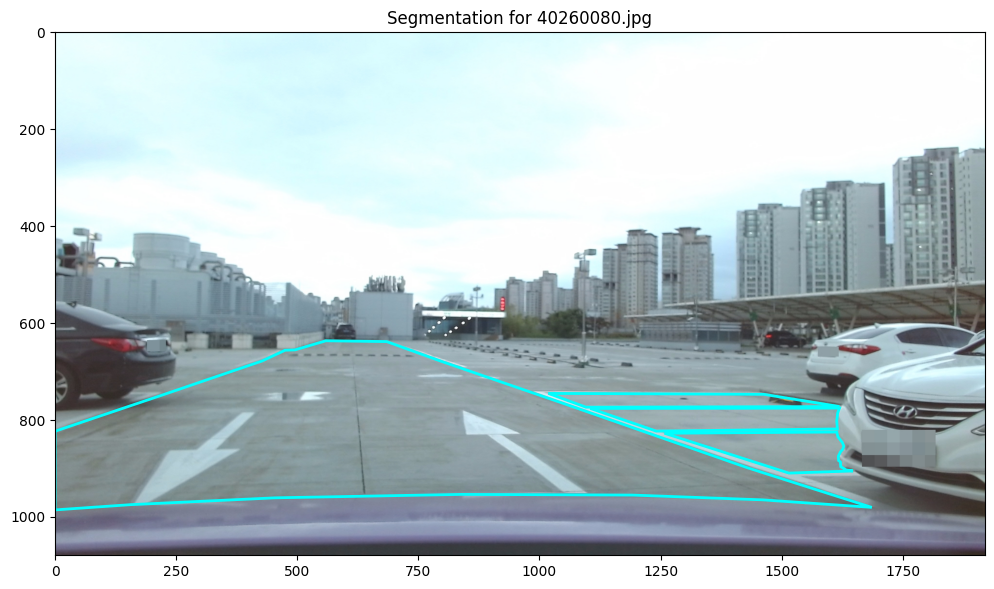

Processing image: 10020534.jpg


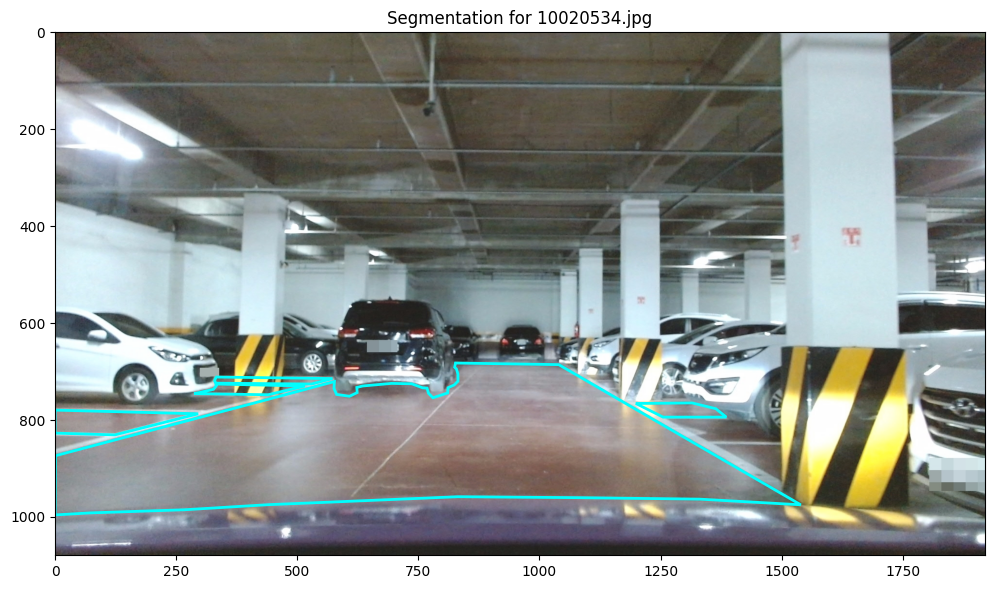

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
from PIL import Image
import numpy as np

# 이미지 및 라벨 파일 경로 지정
image_dir = "/home/elicer/dataset_sort/merged_images"
label_dir = "/home/elicer/new_labels/new_labels_merged"

# 이미지 파일 리스트 생성
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

# 랜덤으로 세 개의 파일 선택
random_files = random.sample(image_files, 3)

def visualize_segmentation(image_path, json_path):
    """
    주어진 이미지와 JSON 파일을 시각화하는 함수.
    """
    with open(json_path) as f:
        labels = json.load(f)

    # 이미지 로드
    image = Image.open(image_path)
    fig, ax = plt.subplots(1, figsize=(12, 8))
    ax.imshow(image)

    # 라벨 시각화
    for label in labels['segmentation']:
        color = 'cyan'  # 라벨에 대한 색상을 설정 (임의로 선택)
        polygon = label['polygon']
        polygon = np.array(polygon)
        p = patches.Polygon(polygon, closed=True, fill=False, edgecolor=color, linewidth=2)
        ax.add_patch(p)

    plt.title(f"Segmentation for {os.path.basename(image_path)}")
    plt.show()

# 선택된 파일들에 대한 작업 수행
for filename in random_files:
    image_path = os.path.join(image_dir, filename)
    json_path = os.path.join(label_dir, os.path.splitext(filename)[0] + ".json")
    
    print(f"Processing image: {filename}")  # 이미지 파일 이름 출력
    
    if os.path.exists(json_path):
        visualize_segmentation(image_path, json_path)
    else:
        print(f"Label file not found for {filename}")
